# TCC
### Algoritimo de classificação SVC - um tipo de SVM (Support Vector Machine)

In [2]:
#Vou instanciar, treinar e otimizar os parâmetros somente do algoritimo do tipo KNN
# Começando pelos imports necessários para a produção do algoritimo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import DistanceMetric

In [3]:
#Importando a base de dados
base = pd.read_excel('base_10_steps.xlsm')

In [4]:
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,Fcc,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,Fcc,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,Fcc,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,Fcc,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Verificando quantas "respostas" eu tenho
base['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma', 'Fcc+Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Sigma', 'Fcc+Bcc', 'Bcc+Fcc', 'Bcc', 'MnNi_Beta+Fcc',
       'Bcc+MnNi_Beta', 'Sigma+Fcc+MnNi_Beta', 'Bcc+Sigma',
       'Bcc+Fcc+Sigma', 'MnNi_Beta+Bcc', 'Bcc+MnNi_Beta+Sigma',
       'MnNi_Beta+Bcc+Fcc', 'Fcc+CUB_A13', 'Sigma+CUB_A13',
       'Fcc+Bcc+Sigma', 'CUB_A13+Sigma+Fcc'], dtype=object)

In [6]:
valores_de_fase = { 'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
       'CUB_A13+Sigma':3, 'Fcc+Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
       'Sigma+Fcc':3, 'Sigma':2, 'Fcc+Bcc':3, 'Bcc+Fcc':3, 'Bcc':1, 'MnNi_Beta+Fcc':3,
       'Bcc+MnNi_Beta':3, 'Sigma+Fcc+MnNi_Beta':3, 'Bcc+Sigma':3,
       'Bcc+Fcc+Sigma':3, 'MnNi_Beta+Bcc':3, 'Bcc+MnNi_Beta+Sigma':3,
       'MnNi_Beta+Bcc+Fcc':3, 'Fcc+CUB_A13':3, 'Sigma+CUB_A13':3,
       'Fcc+Bcc+Sigma':3, 'CUB_A13+Sigma+Fcc':3
    
}

In [7]:
#Mudando os nomes das fases pelos números correspondentes

base['phase_name'] = base['phase_name'].map(valores_de_fase)

In [8]:
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,NaN,NaN,NaN,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,NaN,NaN,NaN,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,NaN,NaN,NaN,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Substituindo os valores vazios por zero

base = base.fillna(0)
base.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+10Mn+90Ni in x%,1000,0,90.0,10.0,0.0,0.0,0.0,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+20Mn+80Ni in x%,1000,0,80.0,20.0,0.0,0.0,0.0,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+30Mn+70Ni in x%,1000,0,70.0,30.0,0.0,0.0,0.0,9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+40Mn+60Ni in x%,1000,0,60.0,40.0,0.0,0.0,0.0,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Criando bases de Features e Resposta

x = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3 = base[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y= base[['phase_name']]

In [11]:
#Fazer separação para treino e teste usando a divisão mais simples de train_test_split 
#Como o modelo a ser utilizado é o KNN, é preciso trabalhar na normalização dos dados com o StandatScaler

SEED = 10
#Normalização da escala dos dados de features
normalizador = StandardScaler()
normalizador2 = StandardScaler()
normalizador3 = StandardScaler()

x_normalizado = normalizador.fit_transform(x)
x_normalizado_2 = normalizador2.fit_transform(x_2)
x_normalizado_3 = normalizador3.fit_transform(x_3)

#Divisião inicial apenas com a base de features x

x_treino, x_teste, y_treino,y_teste =  train_test_split(x_normalizado, np.ravel(y),
                                                                       test_size=0.25, random_state=SEED)



In [12]:
# Utilização de um Dummy classifier para ter uma mínima baseline

Dummy = DummyClassifier(strategy='stratified',random_state=SEED)

Dummy.fit(x_treino,y_treino)
previsao_dummy = Dummy.predict(x_teste)

acuracia_dummy = accuracy_score(y_teste,previsao_dummy)

print('A acurácia do modelo "Bobo" foi de %.2f' % (acuracia_dummy*100),'%')


A acurácia do modelo "Bobo" foi de 49.40 %


In [13]:
# Instanciamento inicial do modelo SVC

svc = SVC()

svc.fit(x_treino, y_treino)

previsao_svc = svc.predict(x_teste)

acuracia_svc = accuracy_score(y_teste, previsao_svc)

print('A acurácia do modelo SVC foi de {0:.2f}'.format(acuracia_svc*100))

A acurácia do modelo SVC foi de 92.03


In [14]:
#Matriz de confusão inicial para visualizar os acertos e erro do modelo

matriz_de_confusao0 = confusion_matrix(y_teste,previsao_svc)
matriz_de_confusao0

array([[148,   0,   0,   2],
       [  0,  15,   0,   3],
       [  0,   0,   0,   6],
       [  9,   0,   0,  68]], dtype=int64)

# Validação cruzada do modelo
### Tratativas e processos para uma validação cruzada

In [15]:
# vou realizar a validação cruzada para o modelo SVC

resultados_svc = cross_validate(svc, x_normalizado, np.ravel(y), cv=10)
resultados_svc

{'fit_time': array([0.02892184, 0.03690004, 0.0319128 , 0.03290987, 0.02293682,
        0.02393484, 0.02194333, 0.02792478, 0.02593207, 0.02892303]),
 'score_time': array([0.0099721 , 0.009974  , 0.00698113, 0.00897789, 0.00997496,
        0.00897527, 0.01396394, 0.00498343, 0.00697923, 0.00498748]),
 'test_score': array([0.79207921, 0.93      , 0.94      , 0.81      , 0.89      ,
        0.91      , 0.89      , 0.95      , 0.91      , 0.8       ])}

In [16]:
#Agora farei um cálculo da média e desvio padrão com as informações do tes_score
media_svc = resultados_svc['test_score'].mean()
desvio_svc = resultados_svc['test_score'].std()
print('A acurácia utilizando o modelo SVC de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_svc*100
                                                                                        ,desvio_svc*100))

A acurácia utilizando o modelo SVC de decisão foi de 88.22% ± 5.66%


In [17]:
#A divisão feita pelo cross_validade não recebe o parâmetro de aleatoriedade, assim o que ele faz é a quebra em n pedaços, porém de forma determinística.
# onde sabemos quantas divisões são, pois passamos essa informação a função.
#Dessa forma o melhor é embaralhar os dados para fazer a validação cruzada, faremos isso utilizando o StratifieldK-fold
#Para o StratifieldK fold passamos o número de divisões em n_splits e o parâmetro de embaralhamento (Shuffe) como True
#Além disso esse modelo ja considera a proporção dos dados existentes em nossa base em relação as respostas
#Por se tratar de um modelo que necessita de normalização vou fazer um pipeline também, onde primeiro irei normalizar e depois treinar a cada split.

#criação do "embaralhador" que considera a stratificação dos dados para criação de cada split

cv_svc_skfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=112)

# Criação de um Pipeline - primeiro a normalização e em seguida a utilização do modelo
pipeline = Pipeline([("normalizacao", normalizador), ("svc", svc)])

resultados_skfold = cross_validate(pipeline, x, np.ravel(y), cv=cv_svc_skfold, return_train_score=False)
media_svc_skfold = resultados_skfold['test_score'].mean()
desvio_svc_skfold = resultados_skfold['test_score'].std()
print('A acurácia utilizando o modelo SVC de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_svc_skfold*100
                                                                                        ,desvio_svc_skfold*100))



A acurácia utilizando o modelo SVC de decisão foi de 91.51% ± 2.01%


# Otimização do modelo
### Feita as analizes de validação cruzada, podemos tentar aprfeiçoar ainda mais o modelo
#### Para isso faremos uma exploração aleatória para explorar a variação de alguns hiperparâmeros

In [18]:
#Varrer todos os hiperparâmetos pode exigir muito processualmente, para isso podemos fazer uma exploração de modo aleatório no modelo
#Com isso podemos encontrar parâmetros que melhor otimizam o modelo usando o RandomizeSearch

espaco_de_parametros_svc= {
    'C': randint(1,500),
    'kernel':['rbf','poly','sigmoid'],
    'degree': randint(2,8),
    'gamma': ['scale','auto']
}

tic_exploracao = time.time()

busca_svc = RandomizedSearchCV(SVC(), espaco_de_parametros_svc, n_iter=100, cv=cv_svc_skfold)
busca_svc.fit(x_normalizado,np.ravel(y))

tac_exploracao = time.time()
tempo_de_exploracao = tac_exploracao-tic_exploracao

print('O tempo para analise exploratória de parâmetros foi de', tempo_de_exploracao,' segundos')

results_svc_randomize = pd.DataFrame(busca_svc.cv_results_)
results_svc_randomize

O tempo para analise exploratória de parâmetros foi de 120.00830674171448  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018355,0.004258,0.002194,0.000400,54,3,scale,sigmoid,"{'C': 54, 'degree': 3, 'gamma': 'scale', 'kern...",0.772277,...,0.73,0.75,0.77,0.76,0.78,0.82,0.78,0.773228,0.025300,83
1,0.031316,0.001683,0.003391,0.001018,495,3,scale,rbf,"{'C': 495, 'degree': 3, 'gamma': 'scale', 'ker...",0.920792,...,0.95,0.95,0.93,0.91,0.91,0.94,0.95,0.935079,0.015578,26
2,0.030218,0.010123,0.003390,0.001424,93,7,auto,rbf,"{'C': 93, 'degree': 7, 'gamma': 'auto', 'kerne...",0.940594,...,0.95,0.97,0.96,0.94,0.98,0.96,0.98,0.958059,0.013925,1
3,0.029919,0.015782,0.004788,0.001597,20,7,auto,rbf,"{'C': 20, 'degree': 7, 'gamma': 'auto', 'kerne...",0.950495,...,0.96,0.95,0.95,0.94,0.95,0.95,0.95,0.948050,0.006018,12
4,0.015948,0.001661,0.002298,0.000909,271,7,auto,sigmoid,"{'C': 271, 'degree': 7, 'gamma': 'auto', 'kern...",0.782178,...,0.73,0.75,0.77,0.76,0.79,0.88,0.78,0.779218,0.039113,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.022539,0.001795,0.003391,0.000914,127,2,auto,rbf,"{'C': 127, 'degree': 2, 'gamma': 'auto', 'kern...",0.950495,...,0.95,0.96,0.96,0.93,0.97,0.95,0.96,0.955050,0.010224,5
96,0.015757,0.002175,0.002094,0.000299,173,4,scale,sigmoid,"{'C': 173, 'degree': 4, 'gamma': 'scale', 'ker...",0.792079,...,0.73,0.75,0.77,0.76,0.79,0.82,0.78,0.774208,0.025904,81
97,0.029920,0.004439,0.002892,0.000941,438,5,scale,rbf,"{'C': 438, 'degree': 5, 'gamma': 'scale', 'ker...",0.920792,...,0.95,0.95,0.93,0.92,0.91,0.94,0.95,0.936079,0.014196,25
98,0.110703,0.028891,0.001796,0.000598,129,5,scale,poly,"{'C': 129, 'degree': 5, 'gamma': 'scale', 'ker...",0.920792,...,0.89,0.92,0.90,0.90,0.91,0.93,0.91,0.910079,0.011901,37


In [18]:
#Impressão do melhor modelo knn entre os explorados
melhor_svc=busca_svc.best_estimator_
print(melhor_svc)

SVC(C=73)


In [19]:
#Função para imprimir o desempenho e os desvios padrões

def imprime_score(scores):
    media=scores.mean()*100
    desvio=scores.std()*100
    print('Acurácia de {0:.2f}'.format(media))
    print('intervalo de confiabilidade é de [{0:.2f},{1:0.2f}]'.format((media-desvio),(media+desvio)))

In [20]:
#avaliando o desempenho do melhor modelo explorado
scores_do_melhor_svc = cross_val_score(melhor_svc,x_normalizado, np.ravel(y), cv=cv_svc_skfold)
imprime_score(scores_do_melhor_svc)

Acurácia de 96.00
intervalo de confiabilidade é de [94.67,97.34]


In [21]:
#Ordenando e visualizando os resultados de todos os modelos gerados

reultados_ordenados_pela_media_svc = results_svc_randomize.sort_values('mean_test_score', ascending=False)
for indice,linha in reultados_ordenados_pela_media_svc.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

96.005 ± 1.338, {'C': 73, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
96.005 ± 1.480, {'C': 80, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
95.805 ± 1.598, {'C': 68, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
95.405 ± 1.018, {'C': 142, 'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'}
95.205 ± 0.747, {'C': 159, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
95.205 ± 0.747, {'C': 157, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
94.905 ± 0.540, {'C': 22, 'degree': 6, 'gamma': 'auto', 'kernel': 'rbf'}
94.805 ± 0.403, {'C': 22, 'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'}
94.805 ± 0.750, {'C': 19, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
94.805 ± 0.602, {'C': 27, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
94.706 ± 0.776, {'C': 188, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
94.706 ± 0.776, {'C': 202, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
94.706 ± 0.776, {'C': 192, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
94.606 ± 0.913, {'C': 201, 'degree': 3,

In [22]:
#treinando melhor medelo com todos os dados da base de 10_steps

melhor_svc.fit(x_normalizado,np.ravel(y))

SVC(C=73)

In [1]:
melhor_svc

NameError: name 'melhor_svc' is not defined

# Teste usando o melhor classicifador
### Nesse teste pegarei uma outra base de dados com um step diferente e medirei sua precisão

In [23]:
#Importação da base para testes, bases onde o step foi 8
base_teste = pd.DataFrame(pd.read_excel('base_8_steps.xlsm'))

In [24]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,Fcc,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,Fcc,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,Fcc,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,Fcc,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,Fcc,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
base_teste['phase_name'].unique()

array(['Fcc', 'CUB_A13', 'MnNi_Beta', 'Fcc+MnNi_Beta', 'Fcc+Sigma',
       'CUB_A13+Sigma+Fcc', 'Sigma+CUB_A13', 'Fcc+MnNi_Beta+Sigma',
       'Sigma+Fcc', 'Bcc+Sigma', 'Fcc+Bcc', 'Fcc+Bcc+Sigma', 'Sigma',
       'Bcc', 'MnNi_Beta+Bcc', 'Bcc+Fcc', 'MnNi_Beta+Bcc+Fcc',
       'Bcc+MnNi_Beta+Sigma', 'Bcc+MnNi_Beta', 'Fcc+Sigma+CUB_A13',
       'CUB_A13+Sigma', 'Bcc+Fcc+Sigma'], dtype=object)

In [26]:
# Identificação das fases presentes e substituição na base
valores_de_fase_teste = {
    'Fcc':0, 'CUB_A13':3, 'MnNi_Beta':3, 'Fcc+MnNi_Beta':3, 'Fcc+Sigma':3,
    'CUB_A13+Sigma+Fcc':3,'Sigma+CUB_A13':3, 'Fcc+MnNi_Beta+Sigma':3,
    'Sigma+Fcc':3, 'Bcc+Sigma':3, 'Fcc+Bcc':3, 'Fcc+Bcc+Sigma':3, 'Sigma':2,
    'Bcc':1, 'MnNi_Beta+Bcc':3, 'Bcc+Fcc':3, 'MnNi_Beta+Bcc+Fcc':3,
    'Bcc+MnNi_Beta+Sigma':3, 'Bcc+MnNi_Beta':3, 'Fcc+Sigma+CUB_A13':3,
    'CUB_A13+Sigma':3, 'Bcc+Fcc+Sigma':3
}

In [27]:
#Mudando os nomes das fases pelos números correspondentes

base_teste['phase_name'] = base_teste['phase_name'].map(valores_de_fase_teste)

In [28]:
base_teste.head()

,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,NaN,NaN,NaN,NaN,10.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,NaN,NaN,NaN,9.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,NaN,NaN,NaN,9.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,NaN,NaN,NaN,8.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,NaN,NaN,NaN,8.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Substituição dos dados vazios por zero
base_teste= base_teste.fillna(0)
base_teste.head()


,CalculationName,AlloyChemistry,T,phase_name,x%(Ni),x%(Mn),x%(Fe),x%(Cr),x%(Co),VEC,...,eVec(Mn#4@Sigma),eVec(Ni#4@Sigma),eVec(Co#1@Bcc),eVec(Co#2@Bcc),eVec(Co#3@Bcc),eVec(Co#4@Bcc),eVec(Cr#4@Bcc),eVec(Fe#4@Bcc),eVec(Mn#4@Bcc),eVec(Ni#4@Bcc)
0,Point Calculation,0Co+0Cr+0Fe+0Mn+100Ni in x%,1000,0,100.0,0.0,0.0,0.0,0.0,10.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Point Calculation_1,0Co+0Cr+0Fe+12.5Mn+87.5Ni in x%,1000,0,87.5,12.5,0.0,0.0,0.0,9.625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Point Calculation_2,0Co+0Cr+0Fe+25Mn+75Ni in x%,1000,0,75.0,25.0,0.0,0.0,0.0,9.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Point Calculation_3,0Co+0Cr+0Fe+37.5Mn+62.5Ni in x%,1000,0,62.5,37.5,0.0,0.0,0.0,8.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Point Calculation_4,0Co+0Cr+0Fe+50Mn+50Ni in x%,1000,0,50.0,50.0,0.0,0.0,0.0,8.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
base_teste.shape

(495, 116)

In [31]:
#Criando bases de Features e Resposta

x_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)']]
x_2_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC']]
x_3_base_teste = base_teste[['x%(Ni)','x%(Mn)','x%(Fe)','x%(Cr)','x%(Co)','VEC','Sc']]
y_base_teste= base_teste[['phase_name']]

In [32]:
#normalização da base

x_base_teste_normalizado = normalizador.transform(x_base_teste)

In [33]:
#Aplicação do melhor modelo em cima dos dados desconhecidos

previsao_do_melhor_svc = melhor_svc.predict(x_base_teste_normalizado)
acuracia_em_dados_desconhecidos = accuracy_score(y_base_teste, previsao_do_melhor_svc)
print("A acurácia do melhor modelo svc para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos*100))

A acurácia do melhor modelo svc para dados desconhecidos é de 96.36 %


In [34]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos = confusion_matrix(y_base_teste,previsao_do_melhor_svc)
matriz_confusão_desconhecidos

array([[312,   0,   0,   3],
       [  0,  35,   0,   1],
       [  0,   0,   8,   6],
       [  2,   5,   1, 122]], dtype=int64)

In [35]:
ocorrencia_fases = y_base_teste.groupby(['phase_name']).size()
ocorrencia_fases

phase_name
0    315
1     36
2     14
3    130
dtype: int64

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

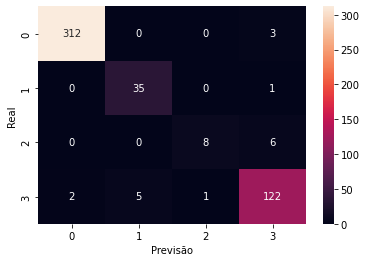

In [52]:
sns.set
mapa_calor_sem_VEC = sns.heatmap(matriz_confusão_desconhecidos, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')
mapa_calor_sem_VEC

## Processo para o melhor modelo SVC, utilizando também como feature o VEC


In [37]:
svc

SVC()

In [38]:
#Aqui como ja temos toda a parte basica, iniciarei pela validação cruzada, com o x_normalizado2

resultados_svc2 = cross_validate(svc, x_normalizado_2, np.ravel(y), cv=10)
resultados_svc2

{'fit_time': array([0.02592993, 0.02393651, 0.0189476 , 0.01795077, 0.01894951,
        0.02094293, 0.02094555, 0.02692723, 0.02393961, 0.02194166]),
 'score_time': array([0.00897622, 0.0139606 , 0.00598383, 0.00498605, 0.00698233,
        0.00398946, 0.01096892, 0.00498676, 0.00697637, 0.00498462]),
 'test_score': array([0.8019802, 0.92     , 0.94     , 0.82     , 0.91     , 0.91     ,
        0.9      , 0.95     , 0.91     , 0.82     ])}

In [39]:
#Agora farei um cálculo da média e desvio padrão com as informações do tes_score
media_svc2 = resultados_svc2['test_score'].mean()
desvio_svc2 = resultados_svc2['test_score'].std()
print('A acurácia utilizando o modelo SVC de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_svc2*100
                                                                                        ,desvio_svc2*100))

A acurácia utilizando o modelo SVC de decisão foi de 88.82% ± 5.08%


In [40]:
# Agora utilizando um embaralhador para minimizar o fator de aleatóriedade na validação cruzada

cv_svc_skfold2 = StratifiedKFold(n_splits=10,shuffle=True,random_state=112)

# Criação de um Pipeline - primeiro a normalização e em seguida a utilização do modelo
pipeline2 = Pipeline([("normalizacao", normalizador), ("svc", svc)])

resultados_skfold2 = cross_validate(pipeline2, x_2, np.ravel(y), cv=cv_svc_skfold2, return_train_score=False)
media_svc_skfold2 = resultados_skfold2['test_score'].mean()
desvio_svc_skfold2 = resultados_skfold2['test_score'].std()
print('A acurácia utilizando o modelo svc de decisão foi de {0:.2f}% ± {1:.2f}%'.format(media_svc_skfold2*100
                                                                                        ,desvio_svc_skfold2*100))


A acurácia utilizando o modelo svc de decisão foi de 91.91% ± 1.69%


#### Otimização do modelo utilizando a base de features com o VEC


In [41]:
# Para otimazação também ja partirei para exploração aleatória ao inves de testar a variação de um único hiperparâmetro

espaco_de_parametros_svc2= {
    'C': randint(1,500),
    'kernel':['rbf','poly','sigmoid'],
    'degree': randint(2,8),
    'gamma': ['scale','auto']

}

tic_exploracao2 = time.time()

busca_svc2 = RandomizedSearchCV(SVC(), espaco_de_parametros_svc2, n_iter=100, cv=cv_svc_skfold2)
busca_svc2.fit(x_normalizado_2,np.ravel(y))

tac_exploracao2 = time.time()
tempo_de_exploracao2 = tac_exploracao2-tic_exploracao2

print('O tempo para analise exploratória de parâmetros foi de', tempo_de_exploracao2,' segundos')

results_svc_randomize2 = pd.DataFrame(busca_svc2.cv_results_)
results_svc_randomize2

O tempo para analise exploratória de parâmetros foi de 72.60993957519531  segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.191185,0.080222,0.002500,0.001112,230,6,auto,poly,"{'C': 230, 'degree': 6, 'gamma': 'auto', 'kern...",0.831683,...,0.77,0.80,0.80,0.79,0.79,0.79,0.82,0.801168,0.016704,54
1,0.011861,0.000833,0.001896,0.000299,312,4,auto,sigmoid,"{'C': 312, 'degree': 4, 'gamma': 'auto', 'kern...",0.772277,...,0.76,0.84,0.83,0.81,0.74,0.81,0.79,0.790228,0.033932,58
2,0.022839,0.001697,0.002390,0.000654,479,6,auto,rbf,"{'C': 479, 'degree': 6, 'gamma': 'auto', 'kern...",0.930693,...,0.95,0.94,0.93,0.94,0.96,0.94,0.95,0.942069,0.008624,29
3,0.022141,0.002510,0.003088,0.001038,190,4,scale,rbf,"{'C': 190, 'degree': 4, 'gamma': 'scale', 'ker...",0.940594,...,0.97,0.96,0.95,0.93,0.95,0.96,0.97,0.952059,0.012434,17
4,0.020950,0.001995,0.002494,0.000663,139,2,auto,rbf,"{'C': 139, 'degree': 2, 'gamma': 'auto', 'kern...",0.950495,...,0.96,0.97,0.95,0.92,0.96,0.96,0.97,0.955050,0.013584,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.013175,0.002677,0.001994,0.000632,20,6,auto,sigmoid,"{'C': 20, 'degree': 6, 'gamma': 'auto', 'kerne...",0.772277,...,0.76,0.84,0.82,0.79,0.74,0.83,0.81,0.791228,0.034640,57
96,0.022037,0.002159,0.003092,0.001509,137,3,auto,rbf,"{'C': 137, 'degree': 3, 'gamma': 'auto', 'kern...",0.950495,...,0.96,0.97,0.95,0.92,0.96,0.97,0.97,0.956050,0.014263,9
97,0.020846,0.001683,0.002502,0.000499,202,5,auto,rbf,"{'C': 202, 'degree': 5, 'gamma': 'auto', 'kern...",0.940594,...,0.97,0.96,0.95,0.93,0.95,0.95,0.97,0.951059,0.012154,18
98,0.022536,0.002416,0.002792,0.000598,286,4,auto,rbf,"{'C': 286, 'degree': 4, 'gamma': 'auto', 'kern...",0.940594,...,0.97,0.96,0.95,0.92,0.97,0.95,0.97,0.950059,0.016699,19


In [42]:
#Impressão do melhor modelo knn entre os explorados
melhor_svc2=busca_svc2.best_estimator_
print(melhor_svc2)

SVC(C=76, degree=4, gamma='auto')


In [43]:
#avaliando o desempenho do melhor modelo explorado
scores_do_melhor_svc2 = cross_val_score(melhor_svc2,x_normalizado_2, np.ravel(y), cv=cv_svc_skfold2)
imprime_score(scores_do_melhor_svc2)

Acurácia de 96.10
intervalo de confiabilidade é de [93.94,98.27]


In [44]:
#Ordenando e visualizando os resultados de todos os modelos gerados

reultados_ordenados_pela_media_svc2 = results_svc_randomize2.sort_values('mean_test_score', ascending=False)
for indice,linha in reultados_ordenados_pela_media_svc2.iterrows():
    print('{0:.3f} ± {1:.3f}, {2}'.format(linha.mean_test_score*100, linha.std_test_score*100, linha.params))

96.103 ± 2.167, {'C': 76, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
96.003 ± 2.051, {'C': 91, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
96.003 ± 2.146, {'C': 69, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
96.003 ± 2.146, {'C': 67, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
95.904 ± 1.814, {'C': 100, 'degree': 6, 'gamma': 'auto', 'kernel': 'rbf'}
95.904 ± 1.814, {'C': 101, 'degree': 5, 'gamma': 'auto', 'kernel': 'rbf'}
95.704 ± 2.283, {'C': 56, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
95.704 ± 2.283, {'C': 56, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
95.605 ± 1.426, {'C': 137, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
95.604 ± 2.108, {'C': 53, 'degree': 5, 'gamma': 'scale', 'kernel': 'rbf'}
95.505 ± 1.430, {'C': 130, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
95.505 ± 1.358, {'C': 155, 'degree': 7, 'gamma': 'auto', 'kernel': 'rbf'}
95.505 ± 1.358, {'C': 139, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
95.504 ± 1.286, {'C': 42, 'degree': 6, 'gam

In [45]:
#treinando melhor medelo com todos os dados da base de 10_steps

melhor_svc2.fit(x_normalizado_2,np.ravel(y))

SVC(C=76, degree=4, gamma='auto')

#### Teste na base desconhecida

In [46]:
#normalização da base

x_base_teste_normalizado2 = normalizador2.transform(x_2_base_teste)

In [47]:
#Aplicação do melhor modelo em cima dos dados desconhecidos

previsao_do_melhor_svc2 = melhor_svc2.predict(x_base_teste_normalizado2)
acuracia_em_dados_desconhecidos2 = accuracy_score(y_base_teste, previsao_do_melhor_svc2)
print("A acurácia do melhor modelo SVC para dados desconhecidos é de {0:.2f} %".format(acuracia_em_dados_desconhecidos2*100))

A acurácia do melhor modelo SVC para dados desconhecidos é de 96.16 %


In [48]:
#Imprimindo uma matriz de confusão em cima da previsão feita para os dados desconhecidos com o melhor estimador
matriz_confusão_desconhecidos2 = confusion_matrix(y_base_teste,previsao_do_melhor_svc2)
matriz_confusão_desconhecidos2

array([[312,   0,   0,   3],
       [  0,  34,   0,   2],
       [  0,   0,   9,   5],
       [  1,   5,   3, 121]], dtype=int64)

[Text(0.5, 15.0, 'Previsão'), Text(33.0, 0.5, 'Real')]

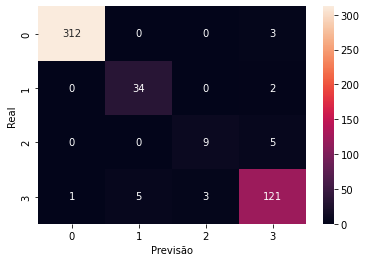

In [51]:
mapa_calor_com_VEC = sns.heatmap(matriz_confusão_desconhecidos2, annot=True, fmt='d').set(xlabel = "Previsão", ylabel='Real')
mapa_calor_com_VEC